<a href="https://colab.research.google.com/github/jmaritar/neural-network/blob/master/src/03_ensalada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Ensaladas

Para hacer una ensalada necesitamos de tres ingredientes básicos: lechuga, tomate y pepino. Si queremos agregar más ingredientes como zanahoria, cebolla, queso, etc., necesitaremos de más ingredientes y esto puede complicar la tarea de mezclar los ingredientes de forma adecuada. Podemos usar una red neuronal con múltiples capas para aprender patrones y relaciones complejas entre los ingredientes y obtener una ensalada deliciosa y equilibrada en sabor y textura. Cada capa puede especializarse en diferentes aspectos, como la combinación de sabores, la textura de los ingredientes, la cantidad de aderezo, etc. De esta manera, podemos obtener una ensalada personalizada y ajustada a nuestras preferencias culinarias.

## Capas de la Red Neuronal

1. **Capa de entrada:** Un vector de 3 elementos representando los ingredientes básicos.
    - X1 = Lechuga
    - X2 = Tomate
    - X3 = Pepino

2. **Capa oculta:** 3 neuronas representando aspectos adicionales de la ensalada.
    - Y1 = Combinación de Sabores
    - Y2 = Textura de Ingredientes
    - Y3 = Cantidad de Aderezo

3. **Capa de salida:** 2 neuronas representando la clasificación de la ensalada.
    - S1 = Ensalada Deliciosa
    - S2 = Ensalada Equilibrada

## Conexiones de la Red Neuronal

Las conexiones entre las capas se representan mediante matrices de pesos.

### De la capa de entrada a la capa oculta

$$
\begin{bmatrix}
0.4 & 0.3 & 0.2 \\
0.5 & 0.4 & 0.3 \\
0.6 & 0.5 & 0.4 \\
\end{bmatrix}
$$

### De la capa oculta a la capa de salida

$$
\begin{bmatrix}
0.3 & 0.2 \\
0.2 & 0.3 \\
0.1 & 0.1 \\
\end{bmatrix}
$$

## Calculando los Pesos

Para determinar si una ensalada es deliciosa o equilibrada, necesitamos:
- X1 = 50 gr de Lechuga
- X2 = 30 gr de Tomate
- X3 = 20 gr de Pepino
- Y1 = 40 (Combinación de Sabores)
- Y2 = 30 (Textura de Ingredientes)
- Y3 = 20 (Cantidad de Aderezo)

### Pesos Calculados

Para una ensalada deliciosa:
- X1 * 0.4 * 50 = 20
- X2 * 0.3 * 30 = 9
- X3 * 0.2 * 20 = 4
- Y1 * 0.3 * 40 = 12
- Y2 * 0.2 * 30 = 6
- Y3 * 0.1 * 20 = 2

Total = 20 + 9 + 4 + 12 + 6 + 2 = 53

Para una ensalada equilibrada:
- X1 * 0.5 * 50 = 25
- X2 * 0.4 * 30 = 12
- X3 * 0.3 * 20 = 6
- Y1 * 0.2 * 40 = 8
- Y2 * 0.3 * 30 = 9
- Y3 * 0.1 * 20 = 2

Total = 25 + 12 + 6 + 8 + 9 + 2 = 62

FloatSlider(value=50.0, description='Lechuga', step=1.0)

FloatSlider(value=30.0, description='Tomate', step=1.0)

FloatSlider(value=20.0, description='Pepino', step=1.0)

FloatSlider(value=40.0, description='Combinación Sabores', step=1.0)

FloatSlider(value=30.0, description='Textura Ingredientes', step=1.0)

FloatSlider(value=20.0, description='Cantidad Aderezo', step=1.0)

Button(description='Clasificar Ensalada', style=ButtonStyle())

Valores: Lechuga=50.0, Tomate=30.0, Pepino=20.0
Combinación de Sabores=40.0, Textura de Ingredientes=30.0, Cantidad de Aderezo=20.0
Valor entrada=33.0, Valor oculto=[20. 19.], Resultado=[53. 52.]
El tipo de ensalada es: Ensalada Deliciosa
Valores: Lechuga=50.0, Tomate=30.0, Pepino=20.0
Combinación de Sabores=40.0, Textura de Ingredientes=30.0, Cantidad de Aderezo=20.0
Valor entrada=33.0, Valor oculto=[20. 19.], Resultado=[53. 52.]


NetworkXError: Node 'Combinacion sabores' has no position.

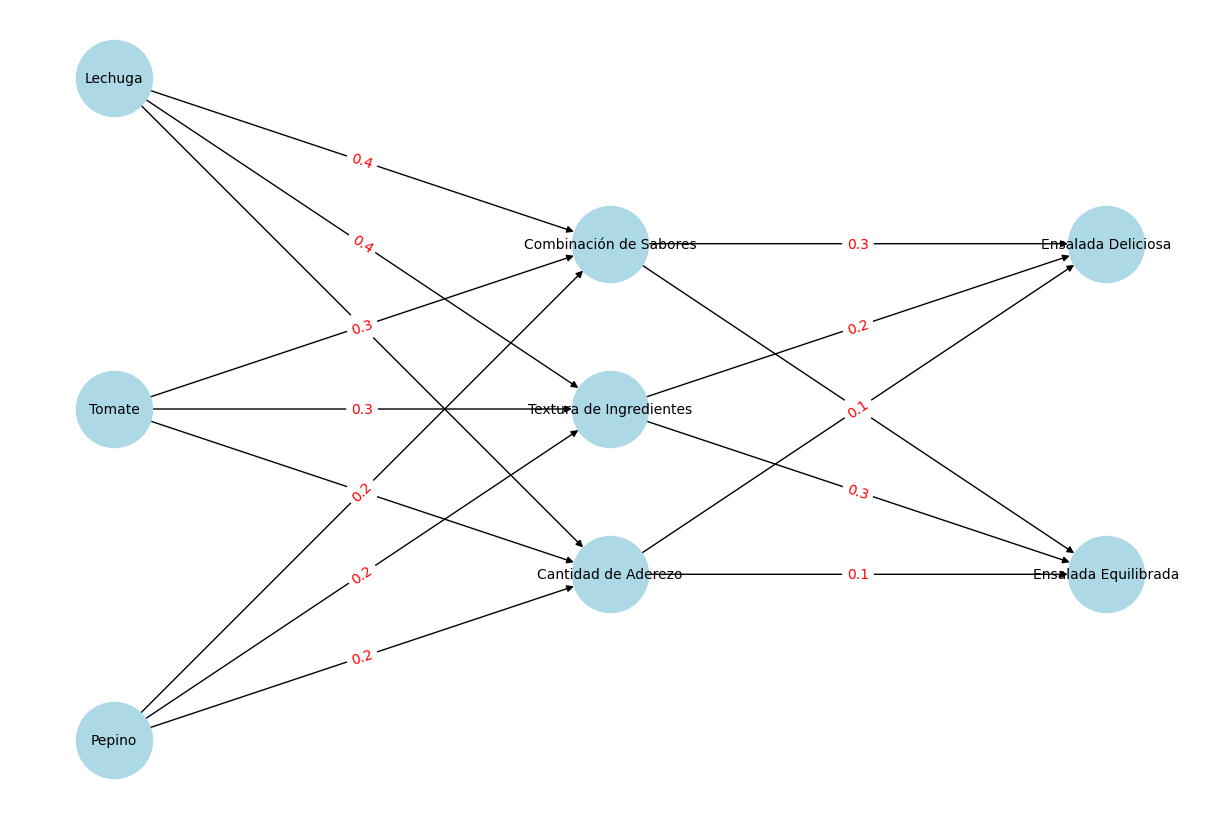

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import ipywidgets as widgets

# Pesos de los ingredientes
pesos_entrada = np.array([0.4, 0.3, 0.2])
pesos_ocultos = np.array([[0.3, 0.2], [0.2, 0.3], [0.1, 0.1]])

# Función para calcular el resultado de la red neuronal
def calcular_resultado(ingredientes_basicos, aspectos_adicionales):
    x = np.array([ingredientes_basicos['lechuga'], ingredientes_basicos['tomate'], ingredientes_basicos['pepino']])
    y = np.array([aspectos_adicionales['combinacion_sabores'], aspectos_adicionales['textura_ingredientes'], aspectos_adicionales['cantidad_aderezo']])
    valor_entrada = np.dot(pesos_entrada, x)
    valor_oculto = np.dot(y, pesos_ocultos)
    resultado = valor_entrada + valor_oculto
    print(f"Valores: Lechuga={ingredientes_basicos['lechuga']}, Tomate={ingredientes_basicos['tomate']}, Pepino={ingredientes_basicos['pepino']}")
    print(f"Combinación de Sabores={aspectos_adicionales['combinacion_sabores']}, Textura de Ingredientes={aspectos_adicionales['textura_ingredientes']}, Cantidad de Aderezo={aspectos_adicionales['cantidad_aderezo']}")
    print(f"Valor entrada={valor_entrada}, Valor oculto={valor_oculto}, Resultado={resultado}")
    return resultado

# Función para determinar el tipo de ensalada
def tipo_de_ensalada(resultado):
    if 50 <= resultado[0] <= 70:
        return "Ensalada Deliciosa"
    elif 50 <= resultado[1] <= 70:
        return "Ensalada Equilibrada"
    else:
        return "Ensalada No Valida"

# Función para visualizar la red neuronal
def visualizar_red(ingredientes_basicos, aspectos_adicionales):
    G = nx.DiGraph()
    edges = [
        ('Lechuga', 'Combinación de Sabores', pesos_entrada[0]), ('Lechuga', 'Textura de Ingredientes', pesos_entrada[0]), ('Lechuga', 'Cantidad de Aderezo', pesos_entrada[0]),
        ('Tomate', 'Combinación de Sabores', pesos_entrada[1]), ('Tomate', 'Textura de Ingredientes', pesos_entrada[1]), ('Tomate', 'Cantidad de Aderezo', pesos_entrada[1]),
        ('Pepino', 'Combinación de Sabores', pesos_entrada[2]), ('Pepino', 'Textura de Ingredientes', pesos_entrada[2]), ('Pepino', 'Cantidad de Aderezo', pesos_entrada[2]),
        ('Combinación de Sabores', 'Ensalada Deliciosa', pesos_ocultos[0][0]), ('Combinación de Sabores', 'Ensalada Equilibrada', pesos_ocultos[0][1]),
        ('Textura de Ingredientes', 'Ensalada Deliciosa', pesos_ocultos[1][0]), ('Textura de Ingredientes', 'Ensalada Equilibrada', pesos_ocultos[1][1]),
        ('Cantidad de Aderezo', 'Ensalada Deliciosa', pesos_ocultos[2][0]), ('Cantidad de Aderezo', 'Ensalada Equilibrada', pesos_ocultos[2][1])
    ]
    G.add_weighted_edges_from(edges)
    pos = {
        'Lechuga': (0, 2), 'Tomate': (0, 1), 'Pepino': (0, 0),
        'Combinación de Sabores': (1, 1.5), 'Textura de Ingredientes': (1, 1), 'Cantidad de Aderezo': (1, 0.5),
        'Ensalada Deliciosa': (2, 1.5), 'Ensalada Equilibrada': (2, 0.5)
    }

    # Determinar los nodos activados
    activaciones = ['Lechuga' if ingredientes_basicos['lechuga'] > 0 else None,
                    'Tomate' if ingredientes_basicos['tomate'] > 0 else None,
                    'Pepino' if ingredientes_basicos['pepino'] > 0 else None]
    activaciones += [aspect.capitalize().replace('_', ' ') for aspect, val in aspectos_adicionales.items() if val > 0]
    activaciones = list(filter(None, activaciones))

    resultado = calcular_resultado(ingredientes_basicos, aspectos_adicionales)
    tipo_ensalada = tipo_de_ensalada(resultado)
    if tipo_ensalada != "Ensalada No Valida":
        activaciones.append(tipo_ensalada)

    # Dibujar la red neuronal
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar nodos y conexiones activadas
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')

    plt.show()

# Interfaz de usuario para cambiar los valores
lechuga_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Lechuga', value=50)
tomate_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Tomate', value=30)
pepino_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Pepino', value=20)
combinacion_sabores_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Combinación Sabores', value=40)
textura_ingredientes_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Textura Ingredientes', value=30)
cantidad_aderezo_slider = widgets.FloatSlider(min=0, max=100, step=1, description='Cantidad Aderezo', value=20)
button = widgets.Button(description='Clasificar Ensalada')

# Función de manejo del botón
def on_button_clicked(b):
    clear_output(wait=True)
    display(lechuga_slider, tomate_slider, pepino_slider, combinacion_sabores_slider, textura_ingredientes_slider, cantidad_aderezo_slider, button)
    ingredientes_basicos = {
        "lechuga": lechuga_slider.value,
        "tomate": tomate_slider.value,
        "pepino": pepino_slider.value
    }
    aspectos_adicionales = {
        "combinacion_sabores": combinacion_sabores_slider.value,
        "textura_ingredientes": textura_ingredientes_slider.value,
        "cantidad_aderezo": cantidad_aderezo_slider.value
    }
    resultado = calcular_resultado(ingredientes_basicos, aspectos_adicionales)
    tipo_ensalada = tipo_de_ensalada(resultado)
    print(f"El tipo de ensalada es: {tipo_ensalada}")
    visualizar_red(ingredientes_basicos, aspectos_adicionales)

button.on_click(on_button_clicked)

# Mostrar la interfaz
display(lechuga_slider, tomate_slider, pepino_slider, combinacion_sabores_slider, textura_ingredientes_slider, cantidad_aderezo_slider, button)